In [1]:
import warnings
warnings.filterwarnings("ignore","Wswiglal-redir-stdio")

from pycbc.waveform import get_td_waveform, fd_approximants
import matplotlib.pyplot as plt

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


# Generating the first waveform

In [2]:
# We can list the waveforms available for get_td_waveform and get_fd_waveform

from pycbc.waveform import td_approximants, fd_approximants

#list of time domain approximants that are available
print('Time domain waveforms:', td_approximants())

#list of frequency domain approximants that are available
print('Frequency domain waveforms:', fd_approximants())

Time domain waveforms: ['TaylorT1', 'TaylorT2', 'TaylorT3', 'SpinTaylorT1', 'SpinTaylorT4', 'SpinTaylorT5', 'PhenSpinTaylor', 'PhenSpinTaylorRD', 'EOBNRv2', 'EOBNRv2HM', 'TEOBResum_ROM', 'SEOBNRv1', 'SEOBNRv2', 'SEOBNRv2_opt', 'SEOBNRv3', 'SEOBNRv3_pert', 'SEOBNRv3_opt', 'SEOBNRv3_opt_rk4', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv4P', 'SEOBNRv4PHM', 'SEOBNRv2T', 'SEOBNRv4T', 'SEOBNRv4_ROM_NRTidalv2', 'SEOBNRv4_ROM_NRTidalv2_NSBH', 'HGimri', 'IMRPhenomA', 'IMRPhenomB', 'IMRPhenomC', 'IMRPhenomD', 'IMRPhenomD_NRTidalv2', 'IMRPhenomNSBH', 'IMRPhenomHM', 'IMRPhenomPv2', 'IMRPhenomPv2_NRTidal', 'IMRPhenomPv2_NRTidalv2', 'TaylorEt', 'TaylorT4', 'EccentricTD', 'SpinDominatedWf', 'NR_hdf5', 'NRSur7dq2', 'NRSur7dq4', 'SEOBNRv4HM', 'NRHybSur3dq8', 'IMRPhenomXAS', 'IMRPhenomXHM', 'IMRPhenomPv3', 'IMRPhenomPv3HM', 'IMRPhenomXP', 'IMRPhenomXPHM', 'TEOBResumS', 'IMRPhenomT', 'IMRPhenomTHM', 'IMRPhenomTP', 'IMRPhenomTPHM', 'SEOBNRv4HM_PA', 'pSEOBNRv4HM_PA', 'IMRPhenomXAS_NRTidalv2', 'IMRPhenomXP_NRTidalv

In this example, we've chosen to use the 'IMRPhenomD' approximant. (Why?)
This is an implementation of the model introduced in this paper: https://arxiv.org/pdf/1508.07253

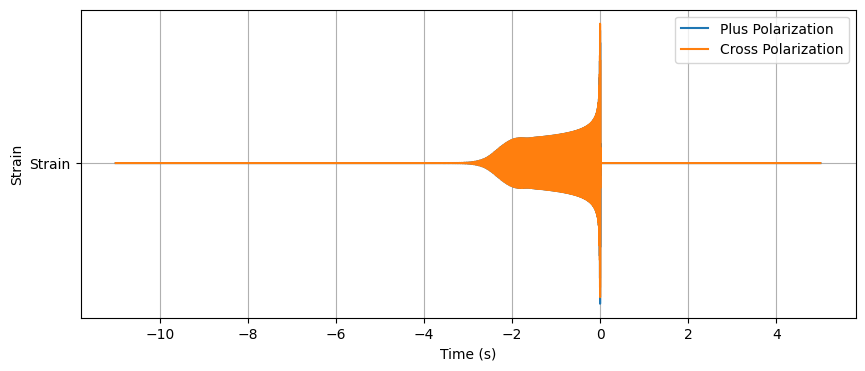

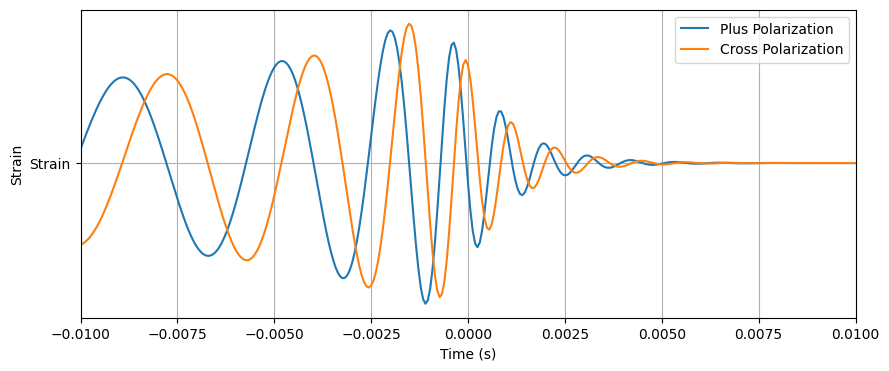

In [3]:
# The outputs of this function are the "plus" and "cross" polarizations of the gravitational wave signal.
# as viewed from the line of sight at a given source inclination.
# (assumed face-on, i.e. zero inclination, if not provided)
hp, hc = get_td_waveform(approximant="IMRPhenomD", mass1=10, mass2=10, delta_t=1.0/16384, f_lower=30)

plt.figure(figsize=(10, 4))
plt.plot(hp.sample_times, hp, label='Plus Polarization')
plt.plot(hp.sample_times, hc, label='Cross Polarization')
plt.plot('Strain')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.legend()
plt.grid()
plt.show()

#Zooming in near the merger time
plt.figure(figsize=(10, 4))
plt.plot(hp.sample_times, hp, label='Plus Polarization')
plt.plot(hp.sample_times, hc, label='Cross Polarization')
plt.plot('Strain')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(-.01, .01)
plt.legend()
plt.grid()
plt.show()

We can see that in this case, the two polarizations differ only by the phase of the signal. This is a known property of the signal, when the orbital plane of the binary does not precess (i.e. the individual black holes spins are aligned with the orbital angular momentum).

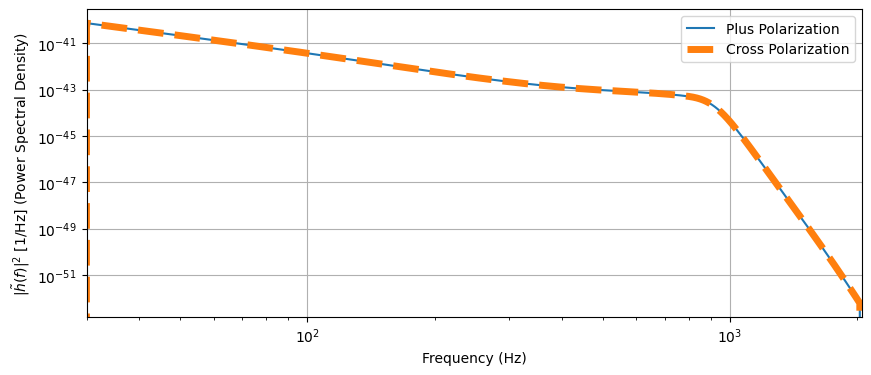

In [4]:
# We can also generate the same waveform in the frequency domain
from pycbc.waveform import get_fd_waveform

hp,hc = get_fd_waveform(approximant="IMRPhenomD", mass1=10, mass2=10, delta_t=1/16384, f_lower=30, delta_f=1)

# We will plot the squared norm of the Fourier components of the signal polarizations.
# For a face-on binary, the plus and cross polarizations only differ by a phase term. Therefore, the two squared norms will be the same
plt.figure(figsize=(10, 4))
plt.loglog(hp.sample_frequencies, hp.squared_norm(), label='Plus Polarization')
plt.loglog(hp.sample_frequencies, hc.squared_norm(), label='Cross Polarization',linestyle='--',linewidth=5)
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'$|\tilde{h}(f)|^2$ [1/Hz] (Power Spectral Density)')
plt.xlim([30,2048])
plt.legend()
plt.grid()
plt.show()

# Effect of mass of the binary on the binary

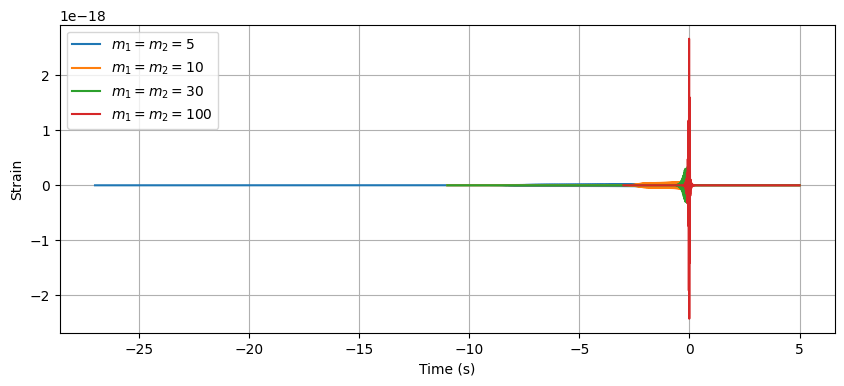

In [5]:
# Component mass of each binary component. We'll assume 
# that each component of the binary has the same mass.
plt.figure(figsize=(10, 4))
for m in [5, 10, 30, 100]:
    hp, hc = get_td_waveform(approximant="IMRPhenomD", mass1=m, mass2=m, delta_t=1.0/16384, f_lower=30)
    plt.plot(hp.sample_times, hp,label='$m_1=m_2=%s$' % m)

plt.legend()
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.show()

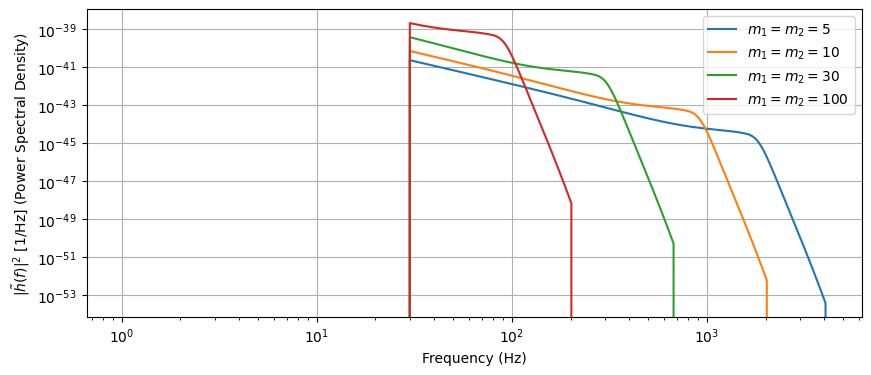

In [6]:
# Frequency domain waveform for different component masses
plt.figure(figsize=(10, 4))
for m in [5, 10, 30, 100]:
    hp, hc = get_fd_waveform(approximant="IMRPhenomD", mass1=m, mass2=m, delta_t=1.0/16384, f_lower=30, delta_f=1)
    plt.loglog(hp.sample_frequencies, hp.squared_norm(),label='$m_1=m_2=%s$' % m)

plt.legend()
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'$|\tilde{h}(f)|^2$ [1/Hz] (Power Spectral Density)')
plt.show()

# Changing the distance in the waveform

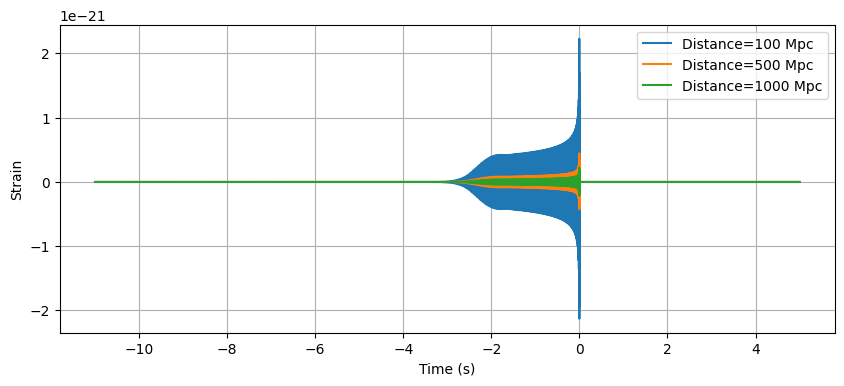

In [7]:
plt.figure(figsize=(10, 4))
for d in [100, 500, 1000]:
    hp, hc = get_td_waveform(approximant="IMRPhenomD", mass1=10, mass2=10, delta_t=1.0/4096, f_lower=30, distance=d)
    plt.plot(hp.sample_times, hp,label='Distance=%s Mpc' % d)

plt.legend()
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.show()    

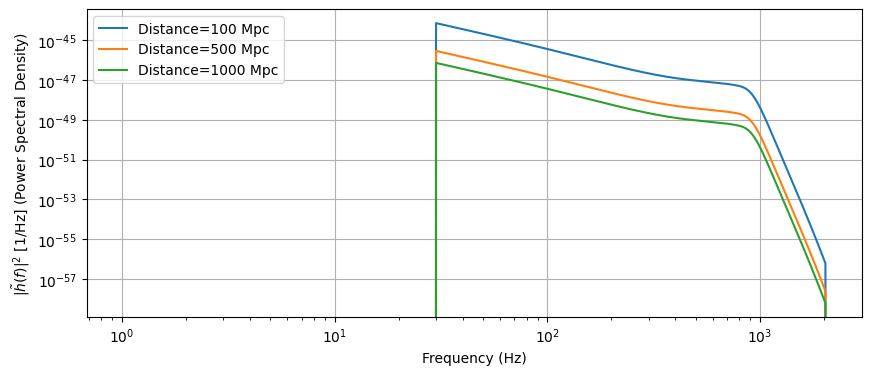

In [8]:
# Frequency domain waveform for different distances
plt.figure(figsize=(10, 4))
for d in [100, 500, 1000]:
    hp, hc = get_fd_waveform(approximant="IMRPhenomD", mass1=10, mass2=10, delta_t=1.0/4096, f_lower=30, distance=d, delta_f=1)
    plt.loglog(hp.sample_frequencies, hp.squared_norm(),label='Distance=%s Mpc' % d)

plt.legend()
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'$|\tilde{h}(f)|^2$ [1/Hz] (Power Spectral Density)')
plt.show()

# Excercise

Generate and plot the waveform associated to the binary neutron star merger GW170817. Look up the GWTC-1 catalog page to obtain the estimated parameters for this source.

How much time does the signal last using a lower frequency of 30 Hz?

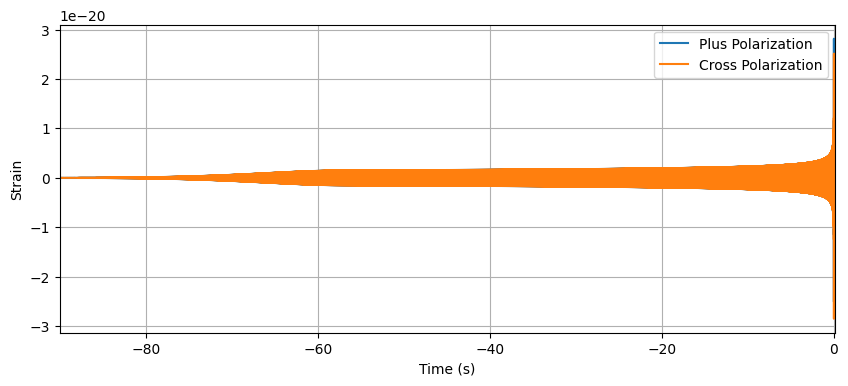

In [9]:
plt.figure(figsize=(10, 4))
hp,hc = get_td_waveform(approximant="IMRPhenomD", mass1=1.46, mass2=1.27, d=40, delta_t=1.0/16384, f_lower=30)
# The mass is in the units of solar masses
# The distance is in the units of Mpc
plt.plot(hp.sample_times, hp, label='Plus Polarization')
plt.plot(hp.sample_times, hc, label='Cross Polarization')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(-90, 0.1)
plt.legend()
plt.grid()
plt.show()

As we can see that the above signal lasted for minutes (less than 2 minutes).